<img src="../img/crowdlearning-etic.png" alt="Logo ETIC" align="right">



<br>
<h2><font color="#004D7F" size=5>Módulo 3</font></h2>



<h1><font color="#004D7F" size=6> Análisis de datos</font></h1>

<br>
<div style="text-align: right">
<font color="#004D7F" size=3>Antonio Jesús Gil</font><br>
<font color="#004D7F" size=3>Introducción a la Ciencia de Datos</font><br>

</div>

---

<a id="indice"></a>
<h2><font color="#004D7F" size=5>Índice</font></h2>

* [1. Introducción](#section1)
* [2. Representación gráfica de las variables](#section2)
* [3. Relación entre variables: análisis demográfico](#section3)

---

<a id="section1"></a>
# <font color="#004D7F"> 1. Introducción</font>

<br>

El análisis exploratorio de datos es una de las labores más importantes de
un _data scientist_. Su función principal es la de ayudarnos a entender el conjunto de datos con el que trabajamos a fin de que seamos capaces de elaborar hipótesis y detectar errores en la captura de datos, así como de permitirnos explorar relaciones entre las variables de nuestro problema. A lo largo de esta práctica llevaremos a cabo el análisis exploratorio de un conjunto de datos, para lo cual emplearemos librerías descritas en módulos anteriores, si bien también introduciremos una de las más utilizadas para llevar a cabo análisis exploratorios en Python: la librería Seaborn. 


<div class="alert alert-block alert-warning">
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
 &nbsp; Durante el análisis se presentarán las funciones más habituales de Seaborn, no obstante, esta práctica no pretende ser un análisis exhaustivo de las funciones de dicha librería, para lo cual se recomienda consultar la [documentación](http://seaborn.pydata.org/index.html).   
</div>

Estas son las librerías necesarias para el resto de la práctica

In [98]:
# Subconjunto mínimo
#import numpy as np
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import colorsys
import seaborn as sns
import warnings
from datetime import datetime
%matplotlib inline
warnings.simplefilter("ignore")

---

<a id="section11"></a> 
## <font color="#004D7F">Conjunto de datos</font>

<br>

Para realizar este análisis exploratorio vamos a utilizar la base de datos `"Banco de datos Marathon"` con el objetivo de estudiar el estado del campo de la ciencia de datos.

Este conjunto de datos contiene los tiempos de todos los ganadores de la maratón de Nueva York desde 1970 hasta 1999.
Las variables son:

* `Year`: Año de la carrera.
* `Gender`: Sexo del ganador, m=male, f=female.
* `Time`: Tiempo del ganador.

Está separado por tabuladores, comenzamos importando los paquetes necesarios.

In [99]:
Boston_15 = pd.read_csv('input/marathon_results_2015.csv', sep=',')
Boston_16 = pd.read_csv('input/marathon_results_2016.csv', sep=',')
Boston_17 = pd.read_csv('input/marathon_results_2017.csv', sep=',')
# El dataset completo:
Boston_15_to_17 = pd.concat([Boston_15, Boston_16, Boston_17], ignore_index=True, sort=False).set_index('Name')
Boston_15_to_17.head()

,Unnamed: 0,Bib,Age,M/F,City,State,Country,Citizen,Unnamed: 9,5K,...,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division,Unnamed: 8
Name,,,,,,,,,,,,,,,,,,,,,
"Desisa, Lelisa",0.0,3,25,M,Ambo,NaN,ETH,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1,NaN
"Tsegay, Yemane Adhane",1.0,4,30,M,Addis Ababa,NaN,ETH,NaN,NaN,0:14:43,...,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2,NaN
"Chebet, Wilson",2.0,8,29,M,Marakwet,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3,NaN
"Kipyego, Bernard",3.0,11,28,M,Eldoret,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4,NaN
"Korir, Wesley",4.0,10,32,M,Kitale,NaN,KEN,NaN,NaN,0:14:43,...,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5,NaN


Comprobamos la existencia de valores nulos en el Dataset

In [100]:
Boston_15_to_17.isnull().sum(axis=0)

Unnamed: 0       26630
Bib                  0
Age                  0
M/F                  0
City                 1
State             8993
Country              0
Citizen          76198
Unnamed: 9       79480
5K                   0
10K                  0
15K                  0
20K                  0
Half                 0
25K                  0
30K                  0
35K                  0
40K                  0
Pace                 0
Proj Time            0
Official Time        0
Overall              0
Gender               0
Division             0
Unnamed: 8       79555
dtype: int64

Mostramos todas las columnas

In [101]:
Boston_15_to_17.columns

Index(['Unnamed: 0', 'Bib', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division', 'Unnamed: 8'],
      dtype='object')

Borramos todas excepto Age, M/F, Country, Official Time y renombramos estas últimas:

In [102]:
Boston = Boston_15_to_17.drop(['Pace','Unnamed: 0','Bib', 'Gender','Unnamed: 9', 'Division', 'State', 'Citizen','Proj Time','City', 'Unnamed: 8','5K','15K', '10K', '25K', '20K', 'Half', '30K', '35K', '40K', 'Overall'], axis='columns')
Boston.head()

,Age,M/F,Country,Official Time
Name,,,,
"Desisa, Lelisa",25,M,ETH,2:09:17
"Tsegay, Yemane Adhane",30,M,ETH,2:09:48
"Chebet, Wilson",29,M,KEN,2:10:22
"Kipyego, Bernard",28,M,KEN,2:10:47
"Korir, Wesley",32,M,KEN,2:10:49


In [103]:
Boston.rename(columns = {'Age': 'Edad', 'M/F':'Sexo','Country':'Pais','Official Time':'Tiempo'}, inplace = True);
#asignando una colección de valores al campo DataFrame.columns.
#Boston.columns = ['Edad','Sexo', 'Pais','Tiempo']
#Boston

In [104]:
Boston.isnull().sum(axis=0)

Edad      0
Sexo      0
Pais      0
Tiempo    0
dtype: int64

In [105]:
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, Desisa, Lelisa to Rigsby, Scott
Data columns (total 4 columns):
Edad      79638 non-null int64
Sexo      79638 non-null object
Pais      79638 non-null object
Tiempo    79638 non-null object
dtypes: int64(1), object(3)
memory usage: 3.0+ MB


,Edad
count,79638.000000
mean,42.415166
std,11.355453
min,18.000000
25%,34.000000
50%,42.000000
75%,50.000000
max,84.000000


Una vez que tenemos los datos hay que clasificar las variables:
* Cuantitativa discreta
* Cualitativa
* Cuantitativa contínua

---

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio </font>

Detecta el tipo para cada una de las columnas del dataset.
¿Nombre? ¿Edad? ¿Género? ¿País? ¿Tiempo oficial? 

Cambiamos las columnas con formato string a temporales y el tiempo lo pasamos a minutos y a formato int32

In [106]:
Boston.Tiempo = pd.to_timedelta(Boston['Tiempo'])
Boston['Tiempo'] = Boston['Tiempo'].astype('m8[m]').astype(np.int32)

Mostramos información del dataset

In [107]:
Boston.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79638 entries, Desisa, Lelisa to Rigsby, Scott
Data columns (total 4 columns):
Edad      79638 non-null int64
Sexo      79638 non-null object
Pais      79638 non-null object
Tiempo    79638 non-null int32
dtypes: int32(1), int64(1), object(2)
memory usage: 2.7+ MB


In [108]:
Boston.describe()

,Edad,Tiempo
count,79638.000000,79638.000000
mean,42.415166,232.672744
std,11.355453,41.536700
min,18.000000,129.000000
25%,34.000000,204.000000
50%,42.000000,226.000000
75%,50.000000,255.000000
max,84.000000,630.000000


Resumen numérico de la edad y el tiempo, se puede decir que existen casi 80 mil observaciones.
la media del tiempo oficial es de 2:32 así que se puede decir que los ganadores finalizan en 2:30 horas. Un posible outlier se puede identificar diferenciando entre el valor mínimo y el máximo a la hora de terminar la marathon.
<br>

La desviación en la variable `Official Time` es de 41 minutos y medio, interesante comprobar si hay outliers.

La media y la mediana (50%) tienen una diferencia de 6 (minutos) luego hay algun valor diferencial que hace haya un desplazamiento.

El valor minimo 1:29 y el máximo 6:30 es muy grande, se ha de tener en cuenta que estos tiempos son tanto de hombres como de mujeres. Se debe segmentar por sexos.

Los datos atipicos suelen aparecer fijándonos en los valores máx y min. 

Por ejemplo, una marathon se corre en unas dos horas y media, para hombres profesional o amateur muy experimentado. Si se observa que el valor de `Time` fuera un numero mayor, es porque bien el dato es erróneo, nos hemos equivocado o el medidor cronómetro esta fallando o realmente es un outlier.

---

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio </font>

Ejercicio: Mostrar la persona más joven y la más vieja en terminar la marathon.

In [ ]:
print('La pesona más vieja tiene {} años.\nLa más joven {}.'
      .format(Boston['Age'].max(), Boston['Age'].min()))

Parece que este archivo `.csv` no sigue la codificación utf-8 que es la que espera `pandas` para leerlo. Para obtener información sobre las posibles codificaciones de un fichero puede recurrirse a la herramienta `chardetect`.

---

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio </font>



<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

---

<a id="section2"></a>
# <font color="#004D7F"> 2. Representación gráfica de las variables</font>

<br>

Representaremos el tiempo de carrera mediante un histograma ya que es una variable contínua.

In [ ]:
plt.figure(figsize=(8,6))
hage = sns.distplot(Boston['Official Time'], color='b')
hage.set_xlabel('Tiempo',fontdict= {'size':14})
hage.set_ylabel(u'Frecuencia',fontdict= {'size':14})
hage.set_title(u'Distribución del tiempo de finalización',fontsize=18)
plt.show()
warnings.simplefilter("ignore")

En los inicios las diferencias entre hombres y mujeres era mayor y se podrian distinguir dos modas (bimodal) el hecho de haber igualado los tiempos y la mayor cantidad de personas hace que el dataset se iguale. En cualquier caso es interesante separar las observaciones por Género.

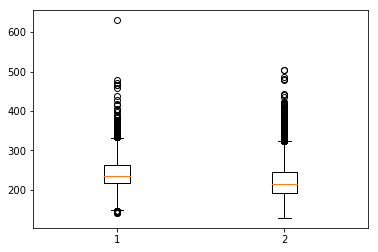

In [109]:
chicas = Boston.Tiempo[Boston.Sexo=='F']
chicos = Boston.Tiempo[Boston.Sexo=='M']
data = [chicas, chicos]
plt.figure(3)
plt.boxplot(data)
plt.show()

---

<a id="section3"></a>
# <font color="#004D7F"> 3. Relación entre variables: análisis demográfico</font>

<br>

Diagrama de dispersion que relaciona tiempo y la edad, vemos que no queda muy claro. Veamos una gráfica por Género

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(Boston.Age, Boston['Official Time'], s=20, marker='o', color='k')
plt.xlabel('Años',fontdict= {'size':14})
plt.ylabel(u'Tiempo',fontdict= {'size':14})
plt.show()
#warnings.simplefilter("ignore")

En este primer análisis vamos a estudiar la distribución basada en edades

In [ ]:
plt.figure(figsize=(8,6))
hage = sns.distplot(Boston.Age, color='g')
hage.set_xlabel('Años',fontdict= {'size':14})
hage.set_ylabel(u'Distribución',fontdict= {'size':14})
hage.set_title(u'Distribución de finalistas por edad',fontsize=18)
plt.show()
warnings.simplefilter("ignore")

Número de finalistas por edad

In [ ]:
plt.figure(figsize=(20,10))
agecont = sns.countplot('Age',data=Boston, palette=sns.color_palette("RdPu", n_colors=len(Boston['Age'].value_counts())))
agecont.set_title('Finalistas por edad', fontsize=18)
agecont.set_xlabel('Añons', fontdict= {'size':16})
agecont.set_ylabel('Total participantes', fontdict= {'size':16})
plt.show()

Para este estudio vamos a centrarnos en `GenderSelect`, `Country`, `Age`, `FormalEducation` y `MajorSelect`. El resto de variables se dejan como ejercicio al alumno. 

### <font color="#004D7F">Género de los participantes</font>

Podemos crear una tabla de frecuencia para ver cuántos casos hay de cada uno de los sexos.  

In [ ]:
plt.figure(figsize=(25,25))
d = sns.countplot(x='Age', hue='M/F', data=Boston, palette={'F':'r','M':'b'}, saturation=0.6)
d.set_title('Número de finalistas por Edad y Género', fontsize=25)
d.set_xlabel('Años',fontdict={'size':20})
d.set_ylabel('Finalistas',fontdict={'size':20})
d.legend(fontsize=16)
plt.show()

In [ ]:
plt.figure(figsize=(25,25))
plt = sns.boxplot(x=Boston)
plt.show()

Otra gráfica muy frecuente es una tarta o `quesito` por Género.  

In [ ]:
plt.figure(figsize=(6,6))
l = Boston['M/F'].value_counts().index
plt.pie(Boston['M/F'].value_counts(), colors =['b','r'], startangle = 90, autopct='%.2f', textprops=dict(color="w"))
#plt.axes().set_aspect('equal','datalim')
plt.legend(l, loc='upper right')
plt.title("Género",fontsize=18)
plt.show()

Las gráficas anteriores muestran una participación femenina significativa. En particular, podemos observar que hasta la edad de 38 años la participación femenina es mayor que la participación masculina. Después de esta edad, el escenario se invierte y la participación masculina supera la participación femenina.
Una explicación puede ser por la maternidad.

In [ ]:
FM_mean = Boston.groupby('M/F').mean()
FM_mean

<div class="alert alert-block alert-info">
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Puesto que Seaborn está basado en Matplotlib, podemos utilizar diferentes funciones de esta librería para modificar parámetros como el tamaño de fuente o el tamaño de la figura.
</div>

Para más información sobre el método, puedes consultar su documentación. 

In [ ]:
? sns.countplot

---

### <font color="#004D7F"> <i class="fa fa-pencil-square-o" aria-hidden="true" style="color:#113D68"></i> Ejercicio </font>

Obtén ...

<div style="text-align: left"><font size=4> <i class="fa fa-check-square-o" aria-hidden="true" style="color:#113D68"></i>
 </font></div>

### <font color="#004D7F">Edad y performance</font>

Podemos seguir el mismo proceso para obtener la distribución de las áreas de especialización de los encuestados. 

In [ ]:
plt.figure(figsize=(12,10))
Boston_copy = Boston.copy()
Boston_copy = Boston_copy[Boston_copy['Age'].isin(range(0,85))]

x = Boston_copy.Age
y = Boston_copy['Official Time']


plt.plot(x, y, '.')
plt.xlabel("Edad", fontsize=16)
plt.ylabel("Tiempo oficial (min)",fontsize=16)
plt.title("Tiempo oficial por edad",fontsize=20)
plt.show()

Como se puede comprobar, con el conjunto total del dataset no es posible encontrar una relación entre la edad y la performance.
Consideramos la `media` y la `mediana` del tiempo oficial para cada edad:

In [ ]:
# The mean of official time for the set of Age 
mean_age_time = Boston.groupby('Age').mean().set_index(np.arange(67))
mean_age_time['Age'] = mean_age_time.index 
mean_age_time.head()

In [ ]:
# The median of official time for the set of Age 
median_age_time = Boston.groupby('Age').median().set_index(np.arange(67))
median_age_time['Age'] = median_age_time.index 
median_age_time.head()

Sería posible quedarnos solo con estos cuatro valores para hacer la gráfica, pero es posible utilizar directamente esta información para realizar el gráfico mediante `sns.barplot`

In [ ]:
# Plotting the results

plt.figure(figsize=(12,10))

x = mean_age_time['Age']
y = mean_age_time['Official Time']

plt.plot(x, y, '.')

xx = median_age_time['Age']
yy = median_age_time['Official Time']


plt.plot(xx, yy, '.', color = 'r')


plt.xlabel("Age", fontsize=16)
plt.ylabel("Official Time (min)",fontsize=16)
plt.title("Official Time for Age",fontsize=20)
plt.legend(['Mean', 'Median'])
plt.show()